In [2]:
from sklearn import svm,datasets

In [3]:
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import matplotlib.pyplot as plt 


In [6]:
iris = datasets.load_iris()

In [7]:
x1 = iris.data
x = iris.data[:,0:2]

In [8]:
y= iris.target

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [10]:
clf = svm.SVC()
clf.fit(x_train,y_train)

SVC()

In [11]:
clf.score(x_test,y_test)

0.868421052631579

In [12]:
def makegrid(x1,x2,h=0.02):
    x1_min ,x1_max = x1.min()-1,x1.max()+1    
    x2_min ,x2_max = x2.min()-1,x2.max()+1  
    a = np.arange(x1_min,x1_max,h)  
    b = np.arange(x2_min,x2_max,h)  
    xx,yy = np.meshgrid(a,b)
    return xx,yy

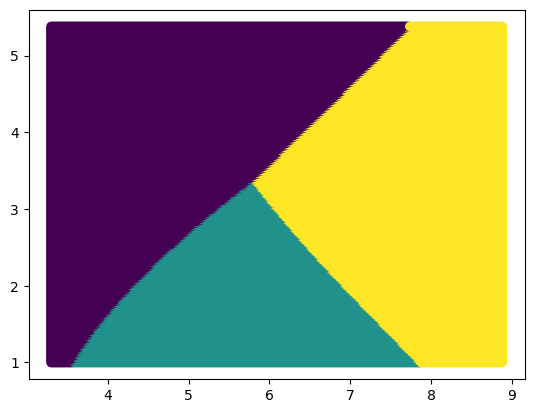

In [13]:
xx ,yy = makegrid(x[:,0],x[:,1])
predictions = clf.predict(np.c_[xx.ravel(),yy.ravel()])
plt.scatter(xx.ravel(),yy.ravel(),c=predictions)
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV


Using svm regressor


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.1, 1, 10,100,10000],
    'kernel': ['linear'],
    'gamma': [0.01, 0.1, 1,0.005,0.0001]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
accuracy = best_model.score(x_test, y_test)


In [33]:
best_model

SVC(C=0.1, gamma=0.01, kernel='linear')

In [34]:
best_params

{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}

In [35]:
accuracy

0.2631578947368421